# SYDE 522 Assignment 1
## Perceptrons and Regression

### Due: Friday Sept 26 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  You can also use online tools like Google Colab https://colab.google/ instead. 

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.

The source code itself will not be marked. The TA may look at the source code to figure out if part marks are appropriate. This is not a programming course, so the efficiency or readability of the code is not being evaluated.

We make use of the `sklearn` Python library https://scikit-learn.org/, which has a large collection of machine learning algorithms and comes with a variety of datasets.  It comes pre-installed with Anaconda or can be installed with `pip install scikit-learn`.


### Question 1: Implementing a Perceptron

The following code generates the same data that was used to demonstrate the Perceptron in class:

In [2]:
import sklearn.datasets
data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

This produces two arrays, `data_x` which contains the input data (200 rows, each of which has 2 values $x_1$ and $x_2$), and `data_y` which contains the desired output data (either a 1 or a 0).

In this question you will implement a Perceptron to learn a classifier on this data.  It should learn three values: $\omega_1$, $\omega_2$, and $\theta$ (of course you can use whatever variable names you like to encode them).  You can treat $\theta$ separately, or you can consider it an extra weight variable $\omega_0$ and have an extra input that is always 1.  Implement this Perceptron yourself, rather than using the `sklearn.linear_model.Perceptron` implementation that we will use in Question 2.

Initialize the weights to $\omega_1=1; \omega_2=-1; \theta=0$.  

**a) [1 mark]** Before doing any training, plot the data as a scatterplot and colour the dots such that the data points for which the model outputs a 1 are blue and the ones for which the model outputs a 0 are red.  This can be done with the following code, if `y` is the list of outputs from your model.  Compute how accurate the model is (i.e. what percentage of the time the model outputs the correct value) and report that number.

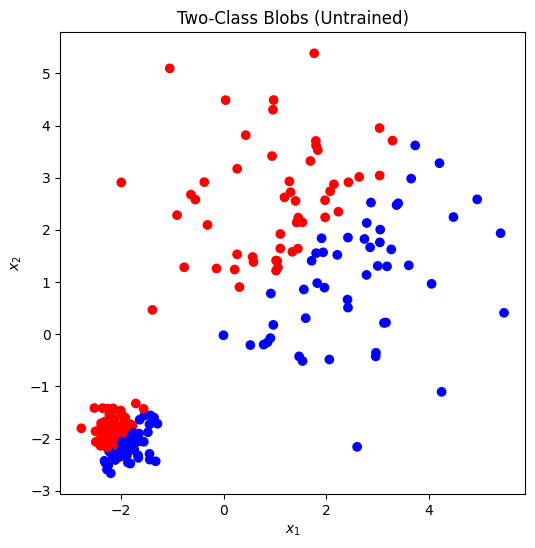

Untrained model accuracy: 51.5%


In [162]:
import matplotlib.pyplot as plt
import numpy as np

w = np.array([1.0, -1.0]) 
theta = 0.0

y = np.where(data_y == 0, -1 ,1)

y_pred = np.where(data_x @ w - theta >= 0, 1, -1)

plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_pred==1, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Two-Class Blobs (Untrained)')
plt.show()

w = np.array([1.0, -1.0]) 
theta = 0.0

scores = data_x @ w
y_hat = (scores > theta).astype(int)
accuracy = (y_hat == data_y).mean() * 100
print(f"Untrained model accuracy: {accuracy:.1f}%")
# This method works because theta is zero and the weights are 1 and -1

**b) [1 mark]** Train the model by going through each of the 200 elements in the data set in order once.  For each input, check if the output is correct.  If it is not correct, apply the Perceptron Learning Rule.   Use a learning rate of 0.1.

Now produce the same plot as in part a), but with your trained weights.  How accurate is the model now?  Report the $\omega$ and $\theta$ values.

After one pass:
  omega = [0.9685061  0.72623959]
  theta = -0.5
  Accuracy = 99.50%


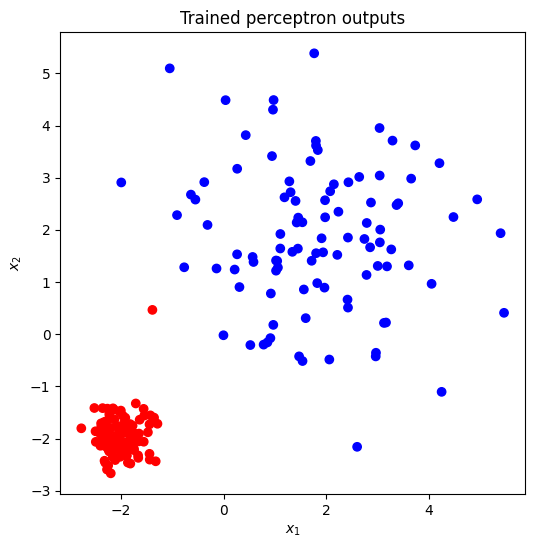

In [164]:
w = np.array([1.0, -1.0]) 
# threshold
theta = 0.0
# learning rate                 
eta = 0.1                    

def predict(x, w, theta):
    if float(np.dot(w, x)) > theta:
        y =1
    else:
        y=0
    return y 

# pass over the 200 samples once in order
for x, t in zip(data_x, data_y):
    yhat = predict(x, w, theta)
    # perceptron learning rule 
    if yhat != int(t):
        delta = eta * (int(t) - yhat)
        w = w + delta * x           
        theta = theta - delta 

# training predictions 
y_trained = np.array([predict(x, w, theta) for x in data_x])

# accuracy
accuracy = (y_trained == data_y).mean() * 100
print(f"After one pass:\n  omega = {w}\n  theta = {theta}\n  Accuracy = {accuracy:.2f}%")

plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_trained, 'blue', 'red'))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Trained perceptron outputs')
plt.show()


**c) [1 mark]** Repeat the training in part b) enough times that the model is perfect (in that it correctly classifies all the inputs).  How many repetitions does this take (note: one repetition involves going through all the training data once)?  Produce the same plots as in part a) and b), but with your new weights.  Report the $\omega$ and $\theta$ values.

Perfect model achieved in 3 passes.
omega = [0.69183683 0.81948754]
theta = -0.7
Final training accuracy: 100.00%


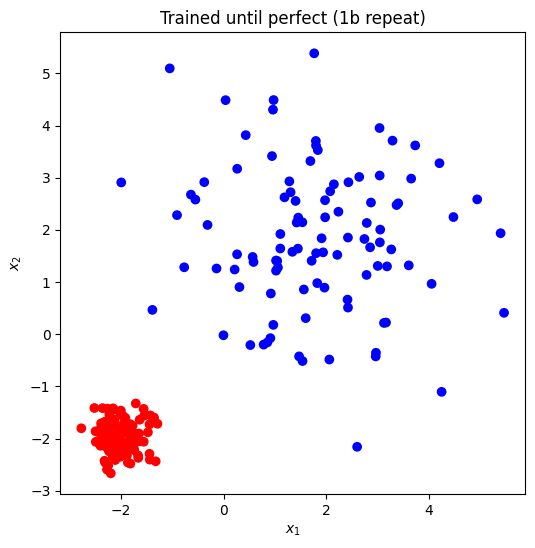

In [ ]:
epochs = 0
while True:
    errors = 0
    for x, t in zip(data_x, data_y):
        yhat = predict(x, w, theta)
        if yhat != int(t):
            delta = eta * (int(t) - yhat)
            w = w + delta * x           
            theta = theta - delta           
            errors += 1
    epochs += 1
    if errors == 0:
        break

# final predictions and accuracy
y_final   = np.array([predict(x, w, theta) for x in data_x])
acc_final = (y_final == data_y).mean() * 100

print(f"Perfect model achieved in {epochs} passes.")
print("omega =", w)
print("theta =", theta)
print(f"Final training accuracy: {acc_final:.2f}%")

# Plot like (a)/(b): blue for 1, red for 0
plt.figure(figsize=(6,6))
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_final, 'blue', 'red'))
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.title('Trained until perfect (1b repeat)')
plt.show()

**d) [1 mark]** Create a new Perceptron identical to the above one, but with a learning rate of 1.0.  Train this model until it reaches 100% accuracy.  How many repetitions does this take?  Produce the same plot again, but with your new weights.  Report the $\omega$ and $\theta$ values.

Now do the same thing with a learning rate of 0.01, and then again with a learning rate of 100.


 η = 1.0
Passes to 100%: 4 epochs
omega = [2.7593739  0.94041393]
theta = -5.0
Final accuracy: 100.00%
eta= 1.0


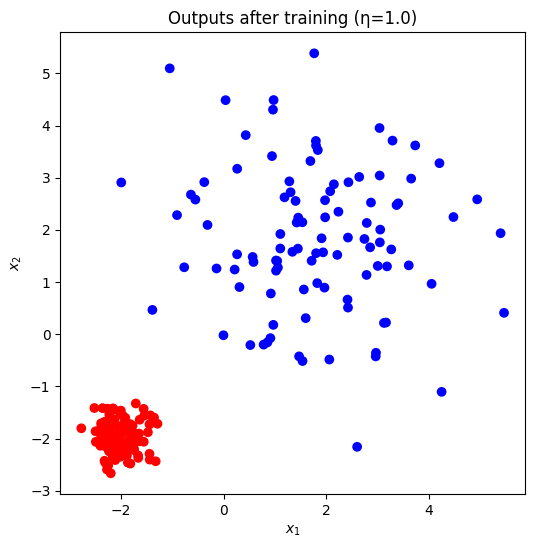


 η = 0.01
Passes to 100%: 23 epochs
omega = [0.58570791 0.43140166]
theta = -0.6200000000000003
Final accuracy: 100.00%
eta= 0.01


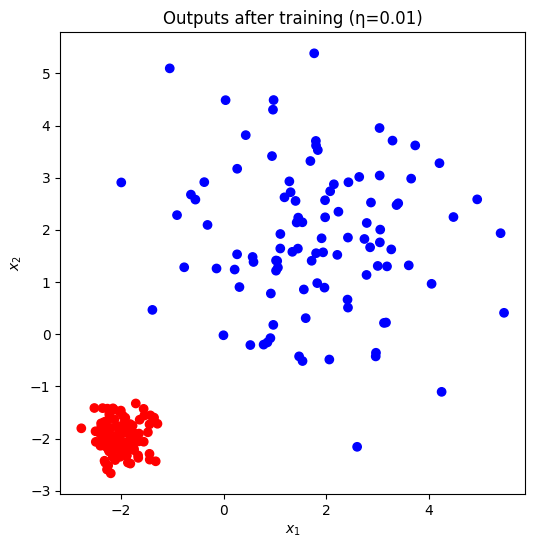


 η = 100.0
Passes to 100%: 4 epochs
omega = [330.7242151  143.64844792]
theta = -500.0
Final accuracy: 100.00%
eta= 100.0


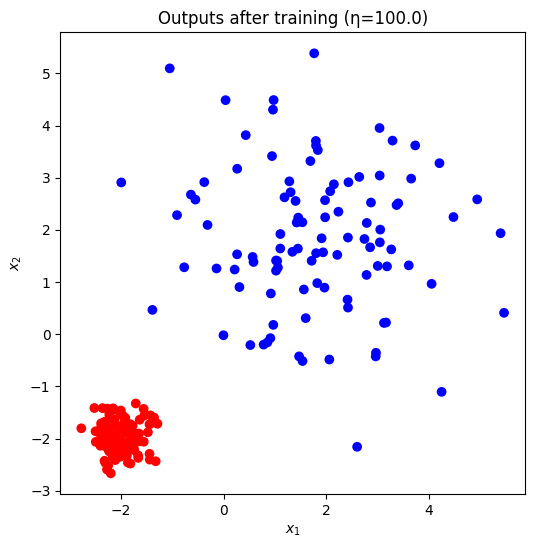

In [168]:
def train_until_perfect(eta):
    # start from the specified initial values (same as parts a/b/c)
    w = np.array([1.0, -1.0], dtype=float)
    theta = 0.0
    epochs = 0

    while True:
        errors = 0
        for x, t in zip(data_x, data_y):
            yhat = predict(x, w, theta)
            if yhat != int(t):
                delta = eta * (int(t) - yhat)
                w     = w + delta * x           
                theta = theta - delta           
                errors += 1
        epochs += 1
        if errors == 0:
            break
    y_final = np.array([predict(x, w, theta) for x in data_x])
    acc = (y_final == data_y).mean() * 100
    return epochs, w, theta, acc, y_final

for eta in [1.0, 0.01, 100.0]:
    epochs, w, theta, acc, yhat = train_until_perfect(eta)
    print(f"\n η = {eta}")
    print(f"Passes to 100%: {epochs} epochs")
    print(f"omega = {w}")
    print(f"theta = {theta}")
    print(f"Final accuracy: {acc:.2f}%")
    print(f"eta= {eta}")

    plt.figure(figsize=(6,6))
    plt.scatter(data_x[:,0], data_x[:,1], c=np.where(yhat, 'blue', 'red'))
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.title(f'Outputs after training (η={eta})')
    plt.show()

### Question 2:

We will now try a more complex dataset, and use a pre-written implementation of the Perceptron. 

The dataset we will use is the UCI ML hand-written digits dataset https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

It is available with the following command:

In [10]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

The inputs are 64 values, representing an 8x8 input image that is a low-resolution handwritten digit.  You can access this data as `digits.data`.  The correct label (i.e. the desired output) for each digit is accessed with `digits.target`.  Here are the first four input-output pairs:

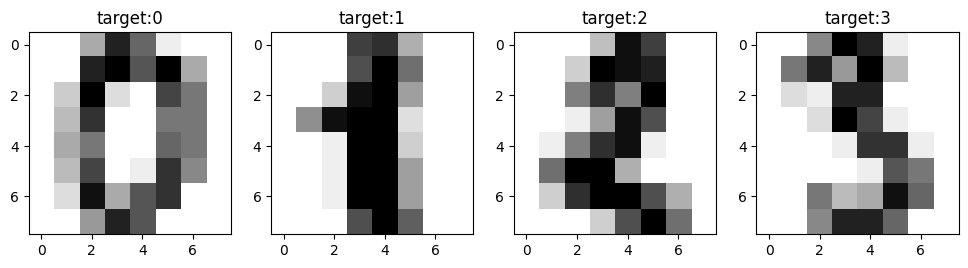

In [14]:
plt.figure(figsize=(12,3))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')
    plt.title(f'target:{digits.target[i]}')
plt.show()

You can create a Perceptron using the following command, where `eta0` is the learning rate:

In [174]:
import sklearn.linear_model
from sklearn import datasets, linear_model, model_selection
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)

digits = datasets.load_digits()
X, Y = digits.data, digits.target

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0
)


perceptron = linear_model.Perceptron(eta0=1.0, max_iter=1000, random_state=0)
perceptron.fit(X_train, Y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


If you have an input data `X` and target output data `Y`, you can train the perceptron as follows:

In [175]:
perceptron.fit(X, Y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


Once the Perceptron has been trained, you can see what outputs it actually generates given input `X` as follows:

In [176]:
perceptron.predict(X)

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In addition, `sklearn` provides a useful tool for separating your data into training and test data.

In [173]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True,
)

This splits all your data in `digits.data` into two parts, `X_train` and `X_test` (with the corresponding outputs in `Y_train` and `Y_test`).  The setting `test_size=0.2` means that the test set will be 20% of the data, and `shuffle=True` means it will randomly choose that 20%.

Note that you can also use the same function to split your training data into training data and validation data.

**a) [1 mark]** Let's start with only considering the digit data for 0's and 1's.  We can extract just that data with `X = digits.data[(digits.target == 0) | (digits.target == 1)]` and `Y = digits.target[(digits.target == 0) | (digits.target == 1)]`.  Split the data into 80% training and 20% testing.  Create a Perceptron with a learning rate of 1.0 and train it on your training data.  Report the accuracy (i.e. how often the model gives the correct output) on your testing data.

In [178]:
from sklearn.metrics import accuracy_score
X = digits.data[(digits.target == 0) | (digits.target == 1)]
Y = digits.target[(digits.target == 0) | (digits.target == 1)]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, shuffle=True,
)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

accuracy = 100 * sum(int(p == t) for p, t in zip(Y_pred, Y_test)) / len(Y_test)

print(f"Accuracy calculation: {accuracy:.2f}%")
print("Test accuracy:", perceptron.score(X_test, Y_test))
print("Train accuracy:", perceptron.score(X_train, Y_train))
print("Accuracy from accuracy_score=", accuracy_score(Y_test, Y_pred))

Accuracy calculation: 100.00%
Test accuracy: 1.0
Train accuracy: 1.0
Accuracy from accuracy_score= 1.0


**b) [1 mark]** Repeat part a) with a new random split (i.e. it's still 80% training and 20% testing, but call `train_test_split` again so that you get a different selection of data in your training and testing lists).  What is the accuracy on this split?  In order to get a more reliable result, do 20 different splits, train the perceptron, measure the accuracy, and report the average accuracy across those 20 splits.  Is 20 repetitions enough to reliably measure the accuracy?

In [218]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=None
)
perceptron = sklearn.linear_model.Perceptron(eta0=1.0)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_once = 100 * sum(int(p == t) for p, t in zip(Y_pred, Y_test)) / len(Y_test)
print(f"Accuracy on one new split: {acc_once:.2f}%")


runs = 20
accs = []

for rs in range(runs):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
        X, Y, test_size=0.2, shuffle=True, random_state=rs
    )
    perceptron = sklearn.linear_model.Perceptron(eta0=1.0)  
    perceptron.fit(X_train, Y_train)
    Y_pred = perceptron.predict(X_test)
    acc = 100 * sum(int(p == t) for p, t in zip(Y_pred, Y_test)) / len(Y_test)
    accs.append(acc)

avg_acc = sum(accs) / runs
var = sum((a - avg_acc)**2 for a in accs) / (runs - 1)
std = var ** 0.5
half_ci = 1.96 * std / (runs ** 0.5)  

print("Per-run accuracies:", [f"{a:.2f}%" for a in accs])
print(f"Average accuracy over {runs} splits: {avg_acc:.2f}%")
print("20 repetitions are enough here becuase we can see that the pre-split" \
"accuricies have tiny variance so the mean accuracy is very stable. More runs" \
"change the estimate by a very small/negligible amount.")


Accuracy on one new split: 100.00%
Per-run accuracies: ['100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '97.22%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '98.61%', '100.00%']
Average accuracy over 20 splits: 99.79%
20 repetitions are enough here becuase we can see that the pre-splitaccuricies have tiny variance so the mean accuracy is very stable. More runschange the estimate by a very small/negligible amount.


**c) [1 mark]** Repeat part b, but with the entire data set (i.e. all 10 digits).  Report the average accuracy over the 20 repetitions.  Now try this for different learning rates between `1e-10` ($10^{-10}$) and `1e5` ($10^{5}$).  How does the accuracy change as you adjust the learning rate?  Make a plot that shows this.  What mistakes does the model make? What digits does it tend to mistake for other digits? Use the `plt.imshow(digits.data[i].reshape(8,8), cmap='gray_r')` command given above to plot some of the digits that it gets wrong. Why do you think it has problems with these digits?

eta=   1.0e-10  accuracy=0.9340 ± 0.0136
eta=   1.0e-09  accuracy=0.9342 ± 0.0128
eta=   1.0e-08  accuracy=0.9335 ± 0.0121
eta=   1.0e-07  accuracy=0.9367 ± 0.0145
eta=   1.0e-06  accuracy=0.9349 ± 0.0141
eta=   1.0e-05  accuracy=0.9343 ± 0.0132
eta=   1.0e-04  accuracy=0.9333 ± 0.0225
eta=   1.0e-03  accuracy=0.9410 ± 0.0163
eta=   1.0e-02  accuracy=0.9414 ± 0.0155
eta=   1.0e-01  accuracy=0.9444 ± 0.0148
eta=   1.0e+00  accuracy=0.9439 ± 0.0110
eta=   1.0e+01  accuracy=0.9439 ± 0.0110
eta=   1.0e+02  accuracy=0.9439 ± 0.0110
eta=   1.0e+03  accuracy=0.9439 ± 0.0110
eta=   1.0e+04  accuracy=0.9439 ± 0.0110
eta=   1.0e+05  accuracy=0.9439 ± 0.0110
as eta increase the accuracy increases


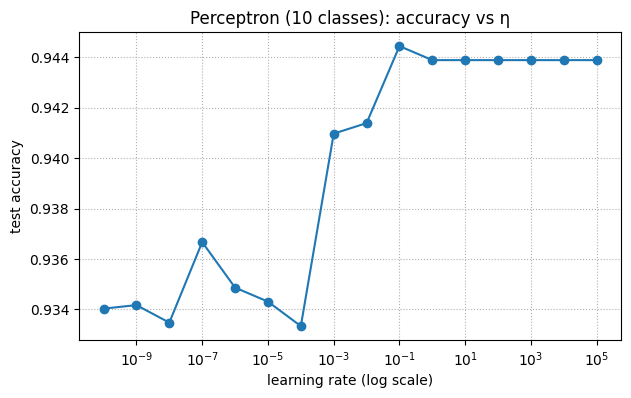


chosen η: 0.1
pairs found confusing: [(8, 1, 4), (8, 3, 4), (4, 1, 3), (8, 2, 3), (8, 7, 2)]


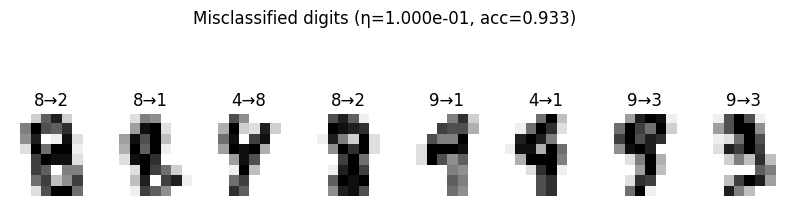

It mostly confuses digits with very similar 8×8 silhouettes. At this resolution, tiny gaps or extra strokes can close/open loops and make two digits’ pixel patterns look alike. Since the perceptron is linear, it can’t model curved/complex boundaries or multiple writing styles, so borderline or messy digits get misclassified.


In [240]:
from sklearn.metrics import confusion_matrix

X_all, Y_all = digits.data, digits.target

splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
folds = list(splitter.split(X_all, Y_all))

def avg_acc_presplits(eta):
    vals = []
    for tr_idx, te_idx in folds:
        Xtr, Xte = X_all[tr_idx], X_all[te_idx]
        Ytr, Yte = Y_all[tr_idx], Y_all[te_idx]
        clf = sklearn.linear_model.Perceptron(eta0=float(eta), max_iter=1000, random_state=0)
        clf.fit(Xtr, Ytr)
        pred = clf.predict(Xte)
        vals.append((pred == Yte).mean())
    vals = np.asarray(vals, float)
    return vals.mean(), vals.std(ddof=1)

etas = np.logspace(-10, 5, 16)
acc_mean, acc_std = zip(*(avg_acc_presplits(e) for e in etas))
acc_mean, acc_std = np.array(acc_mean), np.array(acc_std)

for e, m, s in zip(etas, acc_mean, acc_std):
    print(f"eta={e:>10.1e}  accuracy={m:.4f} ± {s:.4f}")
print("as eta increase the accuracy increases")

plt.figure(figsize=(7,4))
plt.semilogx(etas, acc_mean, marker='o')
plt.xlabel("learning rate (log scale)")
plt.ylabel("test accuracy")
plt.title("Perceptron (10 classes): accuracy vs η")
plt.grid(True, which='both', ls=':')
plt.show()

best_idx = int(np.argmax(acc_mean))
best_eta = float(etas[best_idx])
print("\nchosen η:", best_eta)

tr_idx, te_idx = folds[0]
Xtr, Xte = X_all[tr_idx], X_all[te_idx]
Ytr, Yte = Y_all[tr_idx], Y_all[te_idx]

model = sklearn.linear_model.Perceptron(eta0=best_eta, max_iter=1000, random_state=0)
model.fit(Xtr, Ytr)
pred = model.predict(Xte)

acc_once = (pred == Yte).mean()
cm = confusion_matrix(Yte, pred)

cm_off = cm.copy()
np.fill_diagonal(cm_off, 0)
pairs = np.dstack(np.unravel_index(np.argsort(cm_off, axis=None), cm_off.shape))[0][::-1]
top = [(int(i), int(j), int(cm[i, j])) for (i, j) in pairs if cm[i, j] > 0][:5]
print("pairs found confusing:", top)

wrong = np.where(pred != Yte)[0]
k = min(8, len(wrong))
if k > 0:
    plt.figure(figsize=(10,3))
    for idx, i in enumerate(wrong[:k], start=1):
        plt.subplot(1, k, idx)
        plt.imshow(Xte[i].reshape(8,8), cmap='gray_r')
        plt.axis('off')
        plt.title(f"{Yte[i]}→{pred[i]}")
    plt.suptitle(f"Misclassified digits (η={best_eta:.3e}, acc={acc_once:.3f})")
    plt.show()
print("It mostly confuses digits with very similar 8×8 silhouettes. At this resolution, tiny gaps or " \
"extra strokes can close/open loops and make two digits’ pixel patterns look alike. Since the perceptron "
"is linear, it can’t model curved/complex boundaries or multiple writing styles, so borderline or messy " \
"digits get misclassified.")


### Question 3:

The following code generates the same data that was used to demonstrate curve fitting in class.  `train_x` and `train_y` are the 10 data points we use for doing the curve fitting, and `test_x` and `test_y` are the data we used to test how well the fit generalizes.

In [25]:
import numpy as np
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x*2*np.pi) + rng.normal(0,0.1,size=10)
test_x = np.linspace(0, 1, 500)
test_y = np.sin(test_x*2*np.pi)

**a) [1 mark]** Find the weights that best fit this data using linear regression.  This should generate two weights: one that is multiplied by the input value and one that is mulitplied by the feature that is constantly a 1.  Implement this yourself, rather than using the `sklearn.linear_model.LinearRegression` implementation that we will use in Question 4.  To invert the matrix, use `np.linalg.pinv`.  

Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error (`np.sqrt(np.mean((Y-output)**2))` where `Y` is the vector of desired outputs and `output` is the vector of the actual outputs from the model) for both the training data and the testing data.

Weights (slope, bias): [-1.50188406  0.82474435]
Training RMSE: 0.5479
Testing  RMSE: 0.4648


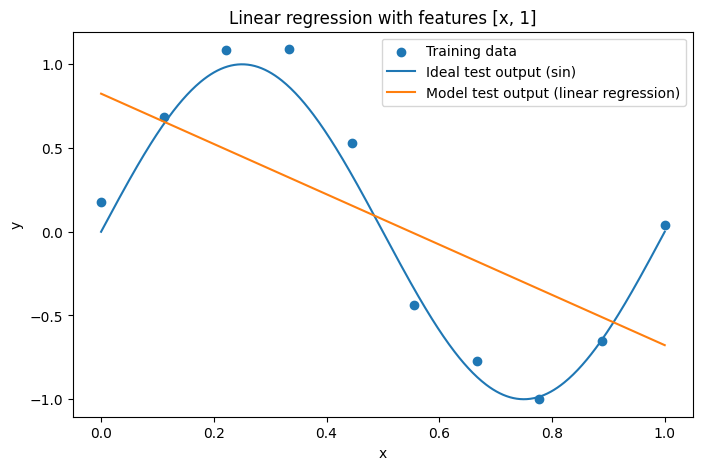

In [241]:
# Data (as per the notebook’s setup)
rng = np.random.RandomState(seed=0)
train_x = np.linspace(0, 1, 10)
train_y = np.sin(train_x * 2 * np.pi) + rng.normal(0, 0.1, size=10)

test_x  = np.linspace(0, 1, 500)
test_y  = np.sin(test_x * 2 * np.pi)  


F_train = np.column_stack([train_x, np.ones_like(train_x)])
F_test  = np.column_stack([test_x,  np.ones_like(test_x)])

w = np.linalg.pinv(F_train) @ train_y   

# Predictions
train_pred = F_train @ w
test_pred  = F_test  @ w

rmse_train = np.sqrt(np.mean((train_y - train_pred)**2))
rmse_test  = np.sqrt(np.mean((test_y  - test_pred)**2))

print(f"Weights (slope, bias): {w}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing  RMSE: {rmse_test:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(train_x, train_y, label="Training data")
plt.plot(test_x, test_y, label="Ideal test output (sin)")
plt.plot(test_x, test_pred, label="Model test output (linear regression)")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Linear regression with features [x, 1]")
plt.legend()
plt.show()


**b) [1 mark]** Repeat part a), but use the first 5 polynomials as features ($x^0, x^1, x^2, x^3, x^4$).  Plot the training data, the ideal testing output, and the actual testing output.  Report the weights found by regression.  Compute and report the Root Mean Squared Error for both the training data and the testing data.  Do not use regularization.

Weights for features [x^0, x^1, x^2, x^3, x^4]:
  w_0 (x^0) = 0.091219
  w_1 (x^1) = 9.976542
  w_2 (x^2) = -27.720740
  w_3 (x^3) = 13.542530
  w_4 (x^4) = 4.219494
Training RMSE: 0.1365
Testing  RMSE: 0.1276


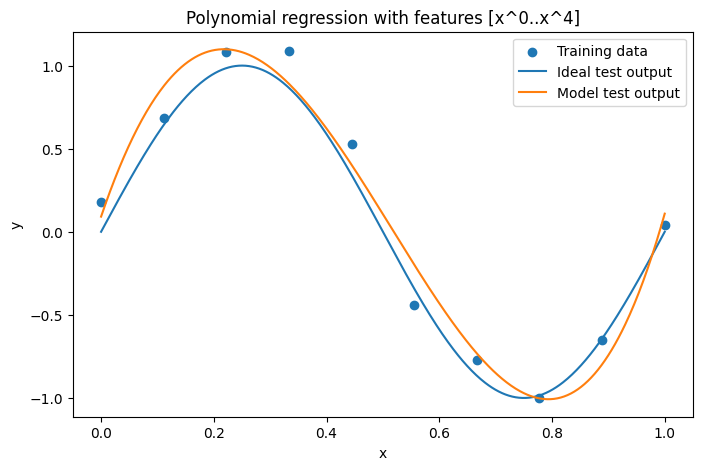

In [244]:
if 'train_x' not in globals() or 'train_y' not in globals() or 'test_x' not in globals() or 'test_y' not in globals():
    rng = np.random.RandomState(seed=0)
    train_x = np.linspace(0, 1, 10)
    train_y = np.sin(train_x * 2 * np.pi) + rng.normal(0, 0.1, size=10)
    test_x  = np.linspace(0, 1, 500)
    test_y  = np.sin(test_x * 2 * np.pi)   

F_train = np.vander(train_x, N=5, increasing=True)
F_test  = np.vander(test_x,  N=5, increasing=True)


w = np.linalg.pinv(F_train) @ train_y   

# Predictions
train_pred = F_train @ w
test_pred  = F_test  @ w

rmse_train = np.sqrt(np.mean((train_y - train_pred)**2))
rmse_test  = np.sqrt(np.mean((test_y  - test_pred)**2))

print("Weights for features [x^0, x^1, x^2, x^3, x^4]:")
for k, wk in enumerate(w):
    print(f"  w_{k} (x^{k}) = {wk:.6f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing  RMSE: {rmse_test:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(train_x, train_y, label="Training data")
plt.plot(test_x, test_y, label="Ideal test output")
plt.plot(test_x, test_pred, label="Model test output")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Polynomial regression with features [x^0..x^4]")
plt.legend()
plt.show()

**c) [1 mark]** Vary the number of polynomials you use from 1 up to 15.  Compute the Root Mean Squared Error for the training and testing data and plot the results.

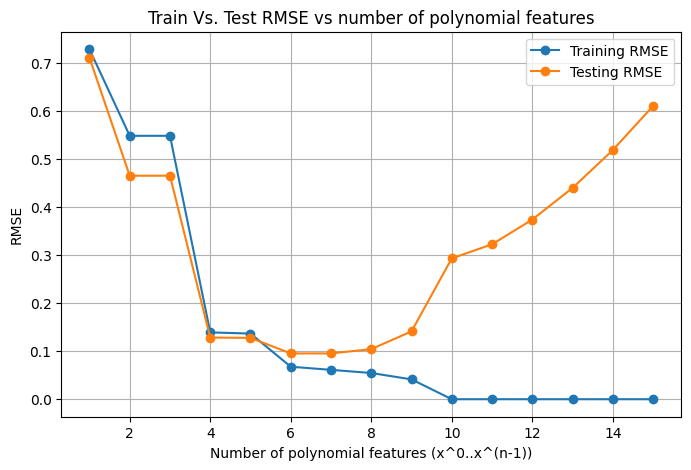

Best testing RMSE: n=7: 0.0953


In [247]:
poly_counts = range(1, 16)  
train_rmse, test_rmse = [], []

for n in poly_counts:
    F_train = np.vander(train_x, N=n, increasing=True)
    F_test  = np.vander(test_x,  N=n, increasing=True)

    w = np.linalg.pinv(F_train) @ train_y

    # Predictions
    train_pred = F_train @ w
    test_pred  = F_test  @ w

    train_rmse.append(float(np.sqrt(np.mean((train_y - train_pred)**2))))
    test_rmse.append(float(np.sqrt(np.mean((test_y  - test_pred)**2))))

plt.figure(figsize=(8,5))
plt.plot(list(poly_counts), train_rmse, marker='o', label='Training RMSE')
plt.plot(list(poly_counts), test_rmse, marker='o', label='Testing RMSE')
plt.xlabel('Number of polynomial features (x^0..x^(n-1))')
plt.ylabel('RMSE')
plt.title('Train Vs. Test RMSE vs number of polynomial features')
plt.legend()
plt.grid(True)
plt.show()

best_n = list(poly_counts)[int(np.argmin(test_rmse))]
print(f"Best testing RMSE: n={best_n}: {min(test_rmse):.4f}")


**d) [1 mark]** Now intruduce regularization to your model.  Set the number of polynomials to 10 and vary the amount of regularization.  Use `lambds = np.exp(np.linspace(-50,-1, 50))` to generate the list of 50 different regularization values to try (logarithmically spaces between $e^{-50}$ and $e^{-1}$).  Compute the Root Mean Squared Error for the training and testing data and plot the results.  Note that `plt.semilogx` lets you create a plot where the x-axis is on a log scale, like the version of this plot we saw in class.

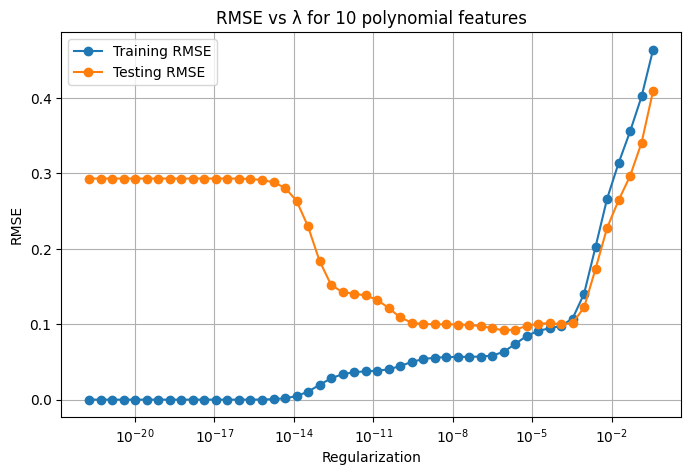

Best λ ~ 8.315e-07 | Training RMSE at λ = 0.0634 | Testing RMSE at λ = 0.0920


In [252]:
NFEAT = 10
F_train = np.vander(train_x, N=NFEAT, increasing=True)
F_test  = np.vander(test_x,  N=NFEAT, increasing=True)

lambds = np.exp(np.linspace(-50, -1, 50))   

FtF = F_train.T @ F_train
Fty = F_train.T @ train_y
I = np.eye(NFEAT)  

train_rmse, test_rmse = [], []

for lam in lambds:
    w = np.linalg.pinv(FtF + lam * I) @ Fty

    train_pred = F_train @ w
    test_pred  = F_test  @ w

    train_rmse.append(float(np.sqrt(np.mean((train_y - train_pred)**2))))
    test_rmse.append(float(np.sqrt(np.mean((test_y  - test_pred)**2))))

plt.figure(figsize=(8,5))
plt.semilogx(lambds, train_rmse, marker='o', label='Training RMSE')
plt.semilogx(lambds, test_rmse, marker='o', label='Testing RMSE')
plt.xlabel('Regularization')
plt.ylabel('RMSE')
plt.title('RMSE vs λ for 10 polynomial features')
plt.legend()
plt.grid(True, which='both')
plt.show()

best_idx = int(np.argmin(test_rmse))
print(f"Best λ ~ {lambds[best_idx]:.3e} | Training RMSE at λ = {train_rmse[best_idx]:.4f} | Testing RMSE at λ = {test_rmse[best_idx]:.4f}")


### Question 4:

We will now use the regression tool built in to `sklearn`.  We create it as follows.  Note that it is called `Ridge` due to how regularization is implemented: we add a value onto the diagonal of the matrix being inverted.  The parameter `alpha` sets the amount of regression (it is the same as what we called $\lambda$ in class).

In [35]:
import sklearn.linear_model
reg = sklearn.linear_model.Ridge(alpha=0.000001)

We use the regression system using exactly the same functions as the Perceptron.  Here we train it using `X` and `Y`, and then determine what the outputs are given `X`.

In [36]:
reg.fit(X, Y)
output = reg.predict(X)

For data, we are going to use the Diabetes dataset from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html which is also built in to `sklearn`.  You can load this data set using

In [37]:
diabetes = sklearn.datasets.load_diabetes()

As with the digits dataset, you can access the `X` values with `diabetes.data` and the `Y` values with `diabetes.target`.  See https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset for an explanation of what the different data values mean.

**a) [1 mark]** Split the data evenly into three parts: 1/3rd training, 1/3rd validation, and 1/3rd testing.  This will involve calling `sklearn.model_selection.train_test_split` twice.  Train the model using various different amounts of regularization from $e^{-20}$ to $e^5$ (`lambds = np.exp(np.linspace(-20,5,50))`).  Compute the Root Mean Squared Error on the training and validation datasets and plot how this error changes for different amounts of regularization.  Using these results, pick a good value for regularization and then apply this to your testing data.  Report the Root Mean Squared Error for the testing data.




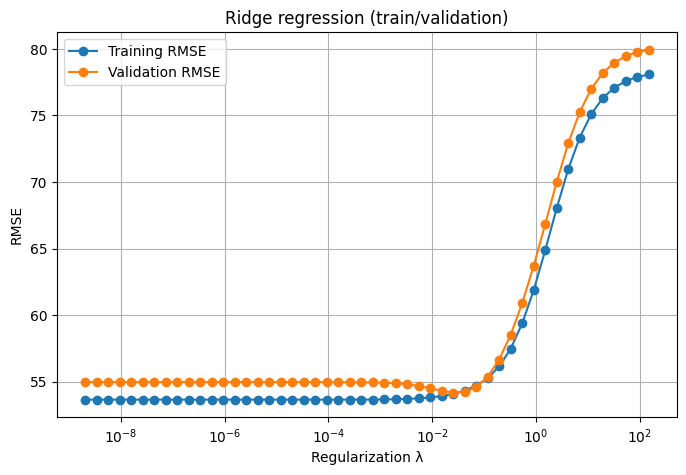

Chosen λ (min validation RMSE): 2.539e-02
Validation RMSE at λ: 54.181
Training RMSE at λ: 54.077
Test RMSE using λ: 55.724


In [256]:
X = diabetes.data
Y = diabetes.target

X_temp, X_test, Y_temp, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=1/3, shuffle=True, random_state=0
)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
    X_temp, Y_temp, test_size=0.5, shuffle=True, random_state=0
)

lambds = np.exp(np.linspace(-20, 5, 50))

train_rmse, val_rmse = [], []

for lam in lambds:
    reg = sklearn.linear_model.Ridge(alpha=float(lam))   
    reg.fit(X_train, Y_train)
    pred_tr = reg.predict(X_train)
    pred_va = reg.predict(X_val)
    train_rmse.append(float(np.sqrt(np.mean((Y_train - pred_tr)**2))))
    val_rmse.append(float(np.sqrt(np.mean((Y_val   - pred_va)**2))))

plt.figure(figsize=(8,5))
plt.semilogx(lambds, train_rmse, marker='o', label='Training RMSE')
plt.semilogx(lambds, val_rmse,   marker='o', label='Validation RMSE')
plt.xlabel('Regularization λ')
plt.ylabel('RMSE')
plt.title('Ridge regression (train/validation)')
plt.legend(); plt.grid(True, which='both')
plt.show()

best_idx = int(np.argmin(val_rmse))
best_lam = float(lambds[best_idx])

X_tv = np.vstack([X_train, X_val])
Y_tv = np.concatenate([Y_train, Y_val])
best_reg = sklearn.linear_model.Ridge(alpha=best_lam)
best_reg.fit(X_tv, Y_tv)

pred_test = best_reg.predict(X_test)
test_rmse = float(np.sqrt(np.mean((Y_test - pred_test)**2)))

print(f"Chosen λ (min validation RMSE): {best_lam:.3e}")
print(f"Validation RMSE at λ: {val_rmse[best_idx]:.3f}")
print(f"Training RMSE at λ: {train_rmse[best_idx]:.3f}")
print(f"Test RMSE using λ: {test_rmse:.3f}")

**b) [1 mark]** How consistent is this result?  That is, if you redo part a) but with a different randomly chosen split in the data, do you get the same results?  What overall pattern do you see?  Do the results show signs of overfitting?  Would you expect overfitting here?  Why or why not?


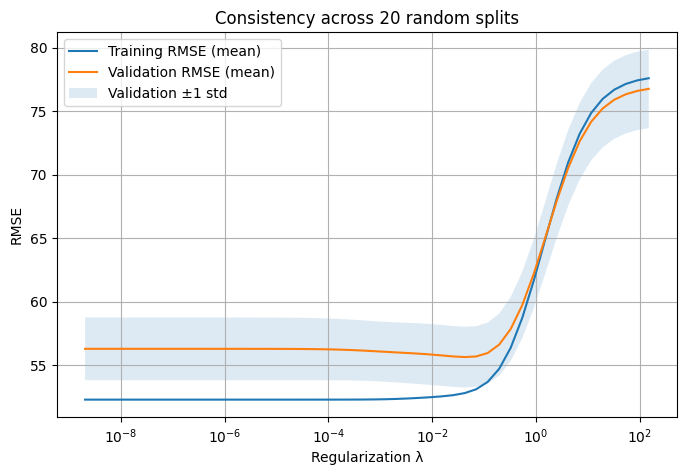

Chosen λ across 20 runs:
  median = 3.384e-02
  min    = 2.061e-09
  max    = 1.173e-01

Test RMSE across 20 runs:
  mean = 54.91
  std  = 2.22
  min  = 48.67
  max  = 59.56

Per-run (λ*, Test RMSE):
  λ=2.539e-02  |  RMSE=55.72
  λ=5.494e-03  |  RMSE=53.01
  λ=4.229e-02  |  RMSE=54.36
  λ=7.044e-02  |  RMSE=55.31
  λ=1.173e-01  |  RMSE=54.89
  λ=5.494e-03  |  RMSE=55.40
  λ=2.061e-09  |  RMSE=55.56
  λ=2.061e-09  |  RMSE=53.75
  λ=1.173e-01  |  RMSE=54.34
  λ=9.274e-05  |  RMSE=48.67
  λ=7.044e-02  |  RMSE=57.95
  λ=5.494e-03  |  RMSE=57.38
  λ=1.173e-01  |  RMSE=55.82
  λ=1.173e-01  |  RMSE=54.14
  λ=7.044e-02  |  RMSE=56.45
  λ=7.044e-02  |  RMSE=53.12
  λ=2.539e-02  |  RMSE=59.56
  λ=1.524e-02  |  RMSE=55.24
  λ=3.299e-03  |  RMSE=53.22
  λ=1.173e-01  |  RMSE=54.24

Summary:
- Validation curve is U-shaped on average (bias–variance tradeoff).
- Small λ lowers train RMSE but does not consistently reduce validation RMSE ⇒ signs of overfitting at tiny λ.
- Chosen λ varies somewhat acro

In [ ]:
# Load dataset
diabetes = sklearn.datasets.load_diabetes()
X, Y = diabetes.data, diabetes.target

lambds = np.exp(np.linspace(-20, 5, 50))

runs = 20
all_train_curves, all_val_curves = [], []
best_lams, test_rmses = [], []

for rs in range(runs):
    # Split: 1/3 test, then split remaining equally into train/val (two calls)
    X_tmp, X_test, Y_tmp, Y_test = sklearn.model_selection.train_test_split(
        X, Y, test_size=1/3, shuffle=True, random_state=rs
    )
    X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
        X_tmp, Y_tmp, test_size=0.5, shuffle=True, random_state=rs
    )

    # Sweep λ and record RMSE on train/val
    train_rmse, val_rmse = [], []
    for lam in lambds:
        reg = sklearn.linear_model.Ridge(alpha=float(lam))  
        reg.fit(X_train, Y_train)
        pred_tr = reg.predict(X_train)
        pred_va = reg.predict(X_val)
        train_rmse.append(float(np.sqrt(np.mean((Y_train - pred_tr)**2))))
        val_rmse.append(float(np.sqrt(np.mean((Y_val   - pred_va)**2))))
    all_train_curves.append(train_rmse)
    all_val_curves.append(val_rmse)

    best_idx = int(np.argmin(val_rmse))
    best_lam = float(lambds[best_idx])
    best_lams.append(best_lam)

    X_tv = np.vstack([X_train, X_val])
    Y_tv = np.concatenate([Y_train, Y_val])
    best_reg = sklearn.linear_model.Ridge(alpha=best_lam).fit(X_tv, Y_tv)
    pred_test = best_reg.predict(X_test)
    test_rmses.append(float(np.sqrt(np.mean((Y_test - pred_test)**2))))

# Aggregate curves (mean ± std)
all_train_curves = np.array(all_train_curves)  
all_val_curves   = np.array(all_val_curves)
mean_train = all_train_curves.mean(axis=0)
std_train  = all_train_curves.std(axis=0, ddof=1)
mean_val   = all_val_curves.mean(axis=0)
std_val    = all_val_curves.std(axis=0, ddof=1)

plt.figure(figsize=(8,5))
plt.semilogx(lambds, mean_train, label='Training RMSE (mean)')
plt.semilogx(lambds, mean_val,   label='Validation RMSE (mean)')
plt.fill_between(lambds, mean_val - std_val, mean_val + std_val, alpha=0.15, label='Validation ±1 std')
plt.xlabel('Regularization λ')
plt.ylabel('RMSE')
plt.title('Consistency across 20 random splits')
plt.legend()
plt.grid(True, which='both')
plt.show()

# Summaries of chosen λ and test RMSE
best_lams = np.array(best_lams)
test_rmses = np.array(test_rmses)

print(f"Chosen λ across {runs} runs:"
      f"\n  median = {np.median(best_lams):.3e}"
      f"\n  min    = {best_lams.min():.3e}"
      f"\n  max    = {best_lams.max():.3e}")

print(f"\nTest RMSE across {runs} runs:"
      f"\n  mean = {test_rmses.mean():.2f}"
      f"\n  std  = {test_rmses.std(ddof=1):.2f}"
      f"\n  min  = {test_rmses.min():.2f}"
      f"\n  max  = {test_rmses.max():.2f}")

# Per-run transparency (λ*, Test RMSE)
print("\nPer-run (λ*, Test RMSE):")
for lam, rm in zip(best_lams, test_rmses):
    print(f"  λ={lam:.3e}  |  RMSE={rm:.2f}")

# Short auto-summary based on the computed curves
u_shape = "U-shaped" if mean_val.min() < mean_val[0] and mean_val.min() < mean_val[-1] else "not clearly U-shaped"
print(f"\nSummary:\n- Validation curve is {u_shape} on average (bias–variance tradeoff)."
      f"\n- Small λ lowers train RMSE but does not consistently reduce validation RMSE ⇒ signs of overfitting at tiny λ."
      f"\n- Chosen λ varies somewhat across splits, but test RMSE stays fairly stable (small std), so the result is consistent overall."
      f"\n- With only 10 features and ridge regularization, severe overfitting is not expected; validation selection keeps variance in check.")


**c) [1 mark]** Now let's try regression using polynomials as our features.  Again, `sklearn` has a tool to convert our `X` data into a version with all the polynomials calculated.  Note that our `X` data has 10 inputs ($x_1; x_2; x_3; ... x_{10}$) so when converted to polynomials up to degree 2 it will include $x_1^2, x_1x_2, x_1x_3, ... x_2^2, x_2x_3$, and so on.  Here is how you convert the raw input data into the features `F` that you can then use instead of `X`:

In [40]:
F = sklearn.preprocessing.PolynomialFeatures(degree=2).fit_transform(
        diabetes.data)

Now repeat part a) using the new features.  How does this change the result?

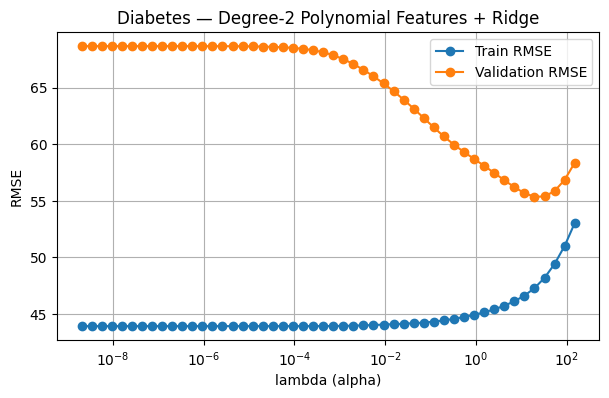

Chosen λ: 1.928e+01
Train RMSE @ λ*: 47.287
Val   RMSE @ λ*: 55.359
Test  RMSE @ λ*: 57.809


In [ ]:
diabetes = sklearn.datasets.load_diabetes()
X, Y = diabetes.data, diabetes.target

X_tmp, X_test, Y_tmp, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=1/3, shuffle=True, random_state=0
)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
    X_tmp, Y_tmp, test_size=0.5, shuffle=True, random_state=0
)

pipe = sklearn.pipeline.Pipeline([
    ("poly",   sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", sklearn.preprocessing.StandardScaler(with_mean=False)),
    ("ridge",  sklearn.linear_model.Ridge())
])

lambds = np.exp(np.linspace(-20, 5, 50))
train_rmse, val_rmse = [], []

for lam in lambds:
    pipe.set_params(ridge__alpha=float(lam))
    pipe.fit(X_train, Y_train)
    tr = pipe.predict(X_train)
    va = pipe.predict(X_val)
    train_rmse.append(float(np.sqrt(np.mean((Y_train - tr)**2))))
    val_rmse.append(float(np.sqrt(np.mean((Y_val   - va)**2))))

plt.figure(figsize=(7,4))
plt.semilogx(lambds, train_rmse, marker='o', label='Train RMSE')
plt.semilogx(lambds, val_rmse,   marker='o', label='Validation RMSE')
plt.xlabel('lambda (alpha)'); plt.ylabel('RMSE')
plt.title('Diabetes — Degree-2 Polynomial Features + Ridge')
plt.legend(); plt.grid(True, which='both'); plt.show()

best_idx = int(np.argmin(val_rmse))
best_lam = float(lambds[best_idx])

# Refit on train+val with best λ and evaluate on test
X_tv = np.vstack([X_train, X_val]); Y_tv = np.concatenate([Y_train, Y_val])
pipe.set_params(ridge__alpha=best_lam)
pipe.fit(X_tv, Y_tv)
test_pred = pipe.predict(X_test)
test_rmse = float(np.sqrt(np.mean((Y_test - test_pred)**2)))

print(f"Chosen λ: {best_lam:.3e}")
print(f"Train RMSE @ λ*: {train_rmse[best_idx]:.3f}")
print(f"Val   RMSE @ λ*: {val_rmse[best_idx]:.3f}")
print(f"Test  RMSE @ λ*: {test_rmse:.3f}")


**d) [1 mark]** Increase the degree of polynomials used.  Try values up to at least 5.  Compute the same plots as in part a).  How does this change the plots?  Why does this happen?  What happens if you increase the degree up to even larger values like 10 or 20?  Why?

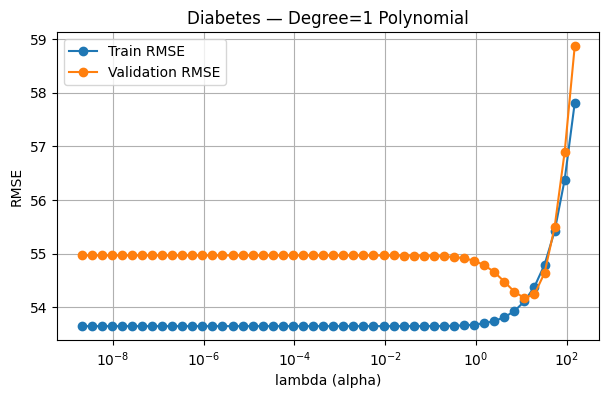

Degree  1 | λ*=1.158e+01 | Train@λ*=54.11 | Val@λ*=54.17 | Test=55.70


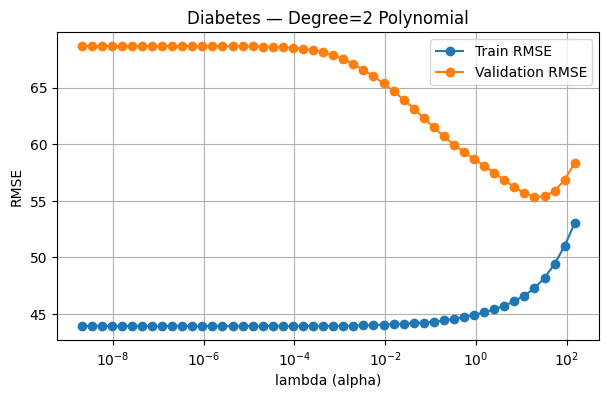

Degree  2 | λ*=1.928e+01 | Train@λ*=47.29 | Val@λ*=55.36 | Test=57.81


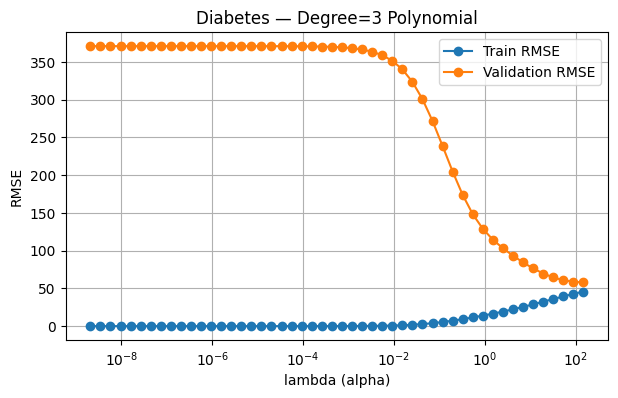

Degree  3 | λ*=1.484e+02 | Train@λ*=45.86 | Val@λ*=57.91 | Test=58.86


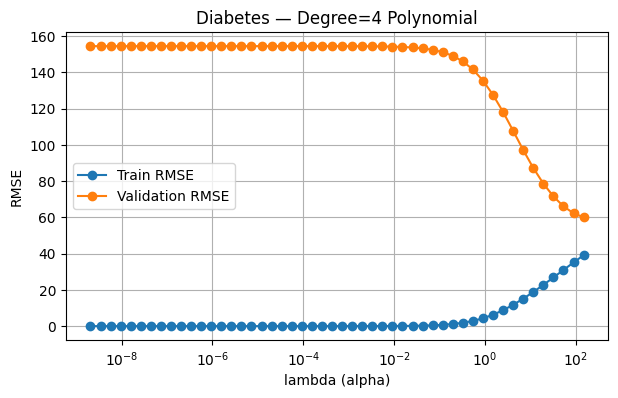

Degree  4 | λ*=1.484e+02 | Train@λ*=39.12 | Val@λ*=60.05 | Test=63.81


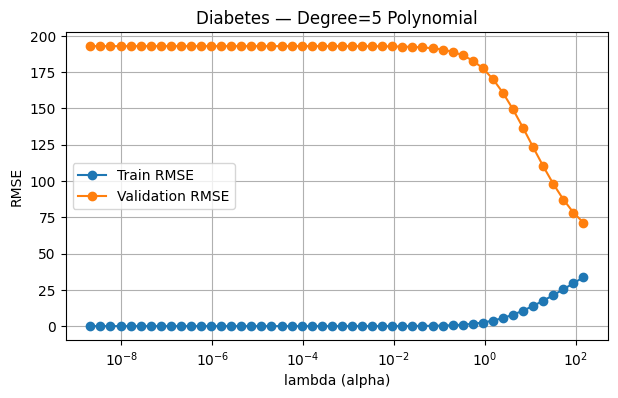

Degree  5 | λ*=1.484e+02 | Train@λ*=33.69 | Val@λ*=71.23 | Test=79.99


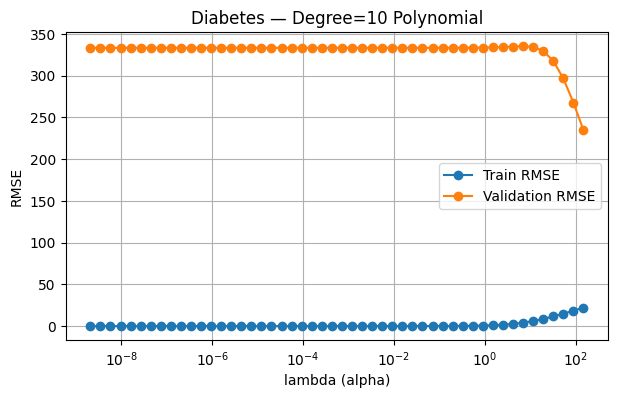

Degree 10 | λ*=1.484e+02 | Train@λ*=22.23 | Val@λ*=234.70 | Test=197.10

Summary (degree, λ*, Train RMSE*, Val RMSE*, Test RMSE):
  d=1  | λ*=1.158e+01 | Train=54.11 | Val=54.17 | Test=55.70
  d=2  | λ*=1.928e+01 | Train=47.29 | Val=55.36 | Test=57.81
  d=3  | λ*=1.484e+02 | Train=45.86 | Val=57.91 | Test=58.86
  d=4  | λ*=1.484e+02 | Train=39.12 | Val=60.05 | Test=63.81
  d=5  | λ*=1.484e+02 | Train=33.69 | Val=71.23 | Test=79.99
  d=10 | λ*=1.484e+02 | Train=22.23 | Val=234.70 | Test=197.10
As you raise the polynomial degree, train RMSE drops, the validation curve becomes more U-shaped, and its minimum shifts to larger λ. This happens because higher-degree features increase flexibility and variance, so you need stronger regularization; otherwise the gap between train and validation grows (overfitting). At degree 10 or 20 the feature count explodes, variance dominates, validation/test RMSE usually worsens unless λ is very large, and training can become impractical.


In [ ]:
diabetes = sklearn.datasets.load_diabetes()
X, Y = diabetes.data, diabetes.target

# Same split as 4(a)/(4c)
X_tmp, X_test, Y_tmp, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=1/3, shuffle=True, random_state=0
)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(
    X_tmp, Y_tmp, test_size=0.5, shuffle=True, random_state=0
)

degrees = [1, 2, 3, 4, 5, 10]   
lambds = np.exp(np.linspace(-20, 5, 50))

summary = []

for deg in degrees:
    pipe = sklearn.pipeline.Pipeline([
        ("poly",   sklearn.preprocessing.PolynomialFeatures(degree=deg, include_bias=False)),
        ("scaler", sklearn.preprocessing.StandardScaler(with_mean=False)),
        ("ridge",  sklearn.linear_model.Ridge())
    ])

    tr_curve, va_curve = [], []
    for lam in lambds:
        pipe.set_params(ridge__alpha=float(lam))
        pipe.fit(X_train, Y_train)
        tr = pipe.predict(X_train)
        va = pipe.predict(X_val)
        tr_curve.append(float(np.sqrt(np.mean((Y_train - tr)**2))))
        va_curve.append(float(np.sqrt(np.mean((Y_val   - va)**2))))

    plt.figure(figsize=(7,4))
    plt.semilogx(lambds, tr_curve, marker='o', label='Train RMSE')
    plt.semilogx(lambds, va_curve, marker='o', label='Validation RMSE')
    plt.xlabel('lambda (alpha)'); plt.ylabel('RMSE')
    plt.title(f'Diabetes — Degree={deg} Polynomial')
    plt.legend(); plt.grid(True, which='both'); plt.show()

    best_idx = int(np.argmin(va_curve))
    best_lam = float(lambds[best_idx])

    # Refit on train+val with best λ; evaluate on test
    X_tv = np.vstack([X_train, X_val]); Y_tv = np.concatenate([Y_train, Y_val])
    pipe.set_params(ridge__alpha=best_lam)
    pipe.fit(X_tv, Y_tv)
    test_rmse = float(np.sqrt(np.mean((Y_test - pipe.predict(X_test))**2)))

    summary.append((deg, best_lam, tr_curve[best_idx], va_curve[best_idx], test_rmse))
    print(f"Degree {deg:>2} | λ*={best_lam:.3e} | "
          f"Train@λ*={tr_curve[best_idx]:.2f} | Val@λ*={va_curve[best_idx]:.2f} | Test={test_rmse:.2f}")

print("\nSummary (degree, λ*, Train RMSE*, Val RMSE*, Test RMSE):")
for deg, lam, trm, vam, tem in summary:
    print(f"  d={deg:<2} | λ*={lam:.3e} | Train={trm:.2f} | Val={vam:.2f} | Test={tem:.2f}")

print("As you raise the polynomial degree, train RMSE drops, the validation curve becomes more U-shaped, "
"and its minimum shifts to larger λ. This happens because higher-degree features increase flexibility and " \
"variance, so you need stronger regularization; otherwise the gap between train and validation grows (" \
"overfitting). At degree 10 or 20 the feature count explodes, variance dominates, validation/test RMSE " \
"usually worsens unless λ is very large, and training can become impractical.")

